<a href="https://colab.research.google.com/github/cabamarcos/MNIST_MLP/blob/main/muinar06_act1_individual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# REDES NEURONALES

---



En esta actividad vamos a utilizar una red neuronal para clasificar im√°genes de d√≠gitos del 0 al 9 escritos a mano. Para ello, utilizaremos Keras con TensorFlow.

El dataset a utilizar es MNIST, una base de datos constituida por (como no) im√°genes de d√≠gitos escritos a mano. Este dataset es ampliamente utilizado en docencia como punto de entrada al entrenamiento de redes neuronales y otros, pero tambi√©n es muy utilizado en trabajos reales de investigaci√≥n para el entrenamiento de im√°genes. Puedes consultar m√°s informaci√≥n sobre el dataset en [este enlace](https://es.wikipedia.org/wiki/Base_de_datos_MNIST).

El c√≥digo utilizado para contestar tiene que quedar claramente reflejado en el Notebook. Puedes crear nuevas celdas si as√≠ lo deseas para estructurar tu c√≥digo y sus salidas. A la hora de entregar el notebook, **aseg√∫rate de que los resultados de ejecutar tu c√≥digo han quedado guardados y que son perfectamente visibles en la versi√≥n PDF que debes entregar adjunta**. Por ejemplo, a la hora de entrenar una red neuronal tiene que verse claramente un log de los resultados de cada epoch.

In [1]:
from keras.datasets.mnist import load_data
import tensorflow as tf
import matplotlib.pyplot as plt

Tenemos la suerte de que el dataset MNIST, el que vamos a utilizar en esta actividad, est√° guardado en Keras, por lo que podemos utilizarlo sin necesidad de buscar el dataset de forma externa.

In [2]:
mnist = tf.keras.datasets.fashion_mnist

Llamar a **load_data** en este dataset nos dar√° dos conjuntos de dos listas, estos ser√°n los valores de entrenamiento y prueba para los gr√°ficos que contienen los d√≠gitos y sus etiquetas.

Nota: Aunque en esta actividad lo veis de esta forma, tambi√©n lo vais a poder encontrar como 4 variables de esta forma: training_images, training_labels, test_images, test_labels = mnist.load_data()

In [3]:
(training_images, training_labels), (test_images, test_labels) = load_data()

11490434/11490434 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 0us/step


Antes de continuar vamos a dar un vistazo a nuestro dataset, para ello vamos a ver una imagen de entrenamiento y su etiqueta o clase.

5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0 

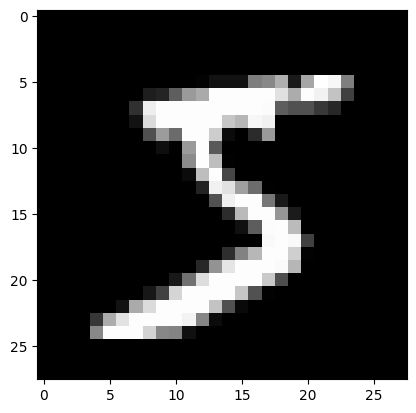

In [4]:
import numpy as np
np.set_printoptions(linewidth=200)
plt.imshow(training_images[0], cmap="gray") # recordad que siempre es preferible trabajar en blanco y negro
#
print(training_labels[0])
print(training_images[0])

## 1. Informaci√≥n sobre el dataset

Una vez tenemos los datos cargados en memoria, vamos a obtener informaci√≥n sobre los mismos.

**Pregunta 1.1 *(0.25 puntos)*** ¬øCu√°ntas im√°genes hay de *training* y de *test*? ¬øQu√© tama√±o tienen las im√°genes?

In [5]:
# Get the number of training and test images
num_training_images = training_images.shape[0]
num_test_images = test_images.shape[0]

# Print the results
print("Number of training images:", num_training_images)
print("Number of test images:", num_test_images)

Number of training images: 60000
Number of test images: 10000


In [6]:
print(training_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


Son 60000 im√°genes de train y 10000 de test y son representadas en una matriz de 28x28

**Pregunta 1.2 *(0.25 puntos)*** Realizar una exploraci√≥n de las variables que contienen los datos. Describir en qu√© consiste un example del dataset (qu√© informaci√≥n se guarda en cada imagen) y describir qu√© contiene la informaci√≥n en y.

In [7]:
# Print the shape and data type of the training images and labels
print("Training images shape:", training_images.shape)
print("Training images data type:", training_images.dtype)
print("Training labels shape:", training_labels.shape)
print("Training labels data type:", training_labels.dtype)

# Print the shape and data type of the test images and labels
print("Test images shape:", test_images.shape)
print("Test images data type:", test_images.dtype)
print("Test labels shape:", test_labels.shape)
print("Test labels data type:", test_labels.dtype)

Training images shape: (60000, 28, 28)
Training images data type: uint8
Training labels shape: (60000,)
Training labels data type: uint8
Test images shape: (10000, 28, 28)
Test images data type: uint8
Test labels shape: (10000,)
Test labels data type: uint8


Cada elemento del dataset es una imagen de 28x28 p√≠xeles en escala de grises representada por una matriz de valores entre 0 y 255 como podemos ver en la matiz impresa que hay encima del ejericio 1.

La variable train o test labels contiene las etiquetas que son n√∫meros del 0 al 9 representando los n√∫meros que aparecen en la imagen.

## 2. Normalizaci√≥n y preprocesado de los datos

**Pregunta 2.1 (0.25 puntos)** Habreis notado que todos los valores numericos est√°n entre 0 y 255. Si estamos entrenando una red neuronal, una buena practica es transformar todos los valores entre 0 y 1, un proceso llamado "normalizaci√≥n" y afortunadamente en Python es f√°cil normalizar una lista. ¬øC√≥mo lo podemos hacer?

In [8]:
training_images = training_images / 255.0
test_images = test_images / 255.0

Se normalizan dividiendo los valores de los p√≠xeles entre 255. Esto ayuda a que la red neuronal entrene m√°s eficientemente, evitando valores grandes que podr√≠an dificultar la convergencia.

**Pregunta 2.2 (0.25 puntos)** Utiliza la funci√≥n ***reshape*** de Numpy para convertir las im√°genes en vectores de caracter√≠sticas de un tama√±o de (N, 784). Explica con tus palabras por qu√© es necesario hacer esto.



In [9]:
training_images = training_images.reshape(60000, 784)
test_images = test_images.reshape(10000, 784)

**Respuesta a la pregunta 2.2**:

las im√°genes tienen 28x28 p√≠xeles, los cuales son 784 si lo multiplicamos. Este ser√° el numero de neuronas de entrada de nuestra red, por lo que tendremos que crear un vector con ese tama√±o

**Pregunta 2.3 (0.25 puntos)** Para facilitar el desarrollo de la actividad, vamos a expresar las etiquetas as√≠:

In [10]:
training_labels = tf.keras.utils.to_categorical(training_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

Muestra c√≥mo son ahora los datos, como resultado de este cambio y tambi√©n de los realizados en las dos preguntas anteriores. Debate c√≥mo se beneficiar√° la red neuronal de todos estos cambios.

In [11]:
# Print the shape and data type of the training images and labels
print("Training images shape:", training_images.shape)
print("Training images data type:", training_images.dtype)
print("Training labels shape:", training_labels.shape)
print("Training labels data type:", training_labels.dtype)

# Print the shape and data type of the test images and labels
print("Test images shape:", test_images.shape)
print("Test images data type:", test_images.dtype)
print("Test labels shape:", test_labels.shape)
print("Test labels data type:", test_labels.dtype)

Training images shape: (60000, 784)
Training images data type: float64
Training labels shape: (60000, 10)
Training labels data type: float64
Test images shape: (10000, 784)
Test images data type: float64
Test labels shape: (10000, 10)
Test labels data type: float64


Respuesta a la pregunta 2.3:

La codificaci√≥n one-hot convierte cada etiqueta en un vector donde la posici√≥n correspondiente a la clase es 1 y el resto son 0. Esto es necesario cuando usamos funciones de p√©rdida como categorical_crossentropy, que esperan esta representaci√≥n. Facilita el aprendizaje de la red porque el error se calcula sobre todas las clases posibles.

## 3. Creaci√≥n del Modelo

Ahora vamos a definir el modelo, pero antes vamos a repasar algunos comandos y conceptos muy √∫tiles:
* **Sequential**: Eso define una SECUENCIA de capas en la red neuronal
* **Dense**: A√±ade una capa de neuronas
* **Flatten**: ¬øRecuerdas c√≥mo eran las im√°genes cuando las imprimiste para poder verlas? Un cuadrado, Flatten toma ese cuadrado y lo convierte en un vector de una dimensi√≥n.

Cada capa de neuronas necesita una funci√≥n de activaci√≥n. Normalmente se usa la funci√≥n relu en las capas intermedias y softmax en la ultima capa (en problemas de clasificaci√≥n de m√°s de dos items)
* **Relu** significa que "Si X>0 devuelve X, si no, devuelve 0", as√≠ que lo que hace es pasar s√≥lo valores 0 o mayores a la siguiente capa de la red.
* **Softmax** toma un conjunto de valores, y escoge el m√°s grande.

 **Pregunta 3.1 (0.5 puntos)**. Utilizando Keras, y preparando los datos de X e Y como fuera necesario, define y entrena una red neuronal que sea capaz de clasificar im√°genes de MNIST con las siguientes caracter√≠sticas:

* Una capa de entrada del tama√±o adecuado.
* Una capa oculta de 512 neuronas.
* Una capa final con 10 salidas.

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(784,)),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

c:\Users\Usuario\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Pregunta 3.2 (0.25 puntos)**: ¬øcrees conveniente utilizar una capa flatten en este caso? Motiva tu respuesta.



**Respuesta a la pregunta 3.2**:

No es necesario ya que hemos realizado la funcion reshape en los pasos anteriores

**Pregunta 3.3 (0.25 puntos)**: Utiliza la funci√≥n summary() para mostrar la estructura de tu modelo.

In [ ]:
model.summary()

Model: "sequential"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ dense (Dense)                   ‚îÇ (None, 512)            ‚îÇ       401,920 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_1 (Dense)                 ‚îÇ (None, 10)             ‚îÇ         5,130 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

## 4: Compilaci√≥n y entrenamiento

**Pregunta 4.1 (0.5 puntos)**: Compila tu modelo. Utiliza ***categorical_crossentropy*** como funci√≥n de p√©rdida, ***Adam*** como optimizador, y monitoriza la ***tasa de acierto*** durante el entrenamiento. Explica qu√© hace cada cosa en la compilaci√≥n.

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


**Respuesta a la pregunta 4.1**:

**Pregunta 4.2 (0.5 puntos)**: Utiliza la funci√≥n ***fit()*** para entrenar tu modelo. Para ayudarte en tu primer entrenamiento, utiliza estos valores:
*   epochs = 5
*   batch_size = 32
*   validation_split = 0.25



In [ ]:
model.fit(training_images, training_labels, epochs=5, batch_size=32, validation_split=0.25)

Epoch 1/5
1407/1407 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - accuracy: 0.8875 - loss: 0.3798 - val_accuracy: 0.9566 - val_loss: 0.1401
Epoch 2/5
1407/1407 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 1ms/step - accuracy: 0.9712 - loss: 0.0945 - val_accuracy: 0.9723 - val_loss: 0.0933
Epoch 3/5
1407/1407 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 1ms/step - accuracy: 0.9832 - loss: 0.0556 - val_accuracy: 0.9739 - val_loss: 0.0861
Epoch 4/5
1407/1407 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 1ms/step - accuracy: 0.9885 - loss: 0.0373 - val_accuracy: 0.9736 - val_loss: 0.0874
Epoch 5/5
1407/1407 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 1ms/step - accuracy: 0.9925 - loss: 0.0255 - val_accuracy: 0.9739 - val_loss: 0.0945


# 5: Impacto al variar el n√∫mero de neuronas en las capas ocultas

En este ejercicio vamos a experimentar con nuestra red neuronal cambiando el numero de neuronas por 512 y por otros valores. Para ello, utiliza la red neuronal de la pregunta 3, y su capa oculta cambia el n√∫mero de neuronas:

* **216 neuronas en la capa oculta
* **1024 neuronas en la capa oculta

y entrena la red en ambos casos.



In [ ]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(216, activation=tf.nn.relu, input_shape=(784,)),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [ ]:
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model2.fit(training_images, training_labels, epochs=5, batch_size=32, validation_split=0.25)

Epoch 1/5
1407/1407 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 1ms/step - accuracy: 0.8731 - loss: 0.4386 - val_accuracy: 0.9554 - val_loss: 0.1537
Epoch 2/5
1407/1407 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 1ms/step - accuracy: 0.9671 - loss: 0.1142 - val_accuracy: 0.9666 - val_loss: 0.1150
Epoch 3/5
1407/1407 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 1ms/step - accuracy: 0.9782 - loss: 0.0733 - val_accuracy: 0.9688 - val_loss: 0.1016
Epoch 4/5
1407/1407 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 1ms/step - accuracy: 0.9847 - loss: 0.0512 - val_accuracy: 0.9713 - val_loss: 0.0968
Epoch 5/5
1407/1407 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 1ms/step - accuracy: 0.9883 - loss: 0.0385 - val_accuracy: 0.9723 - val_loss: 0.0971


In [ ]:
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1024, activation=tf.nn.relu, input_shape=(784,)),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [ ]:
model3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model3.fit(training_images, training_labels, epochs=5, batch_size=32, validation_split=0.25)

Epoch 1/5
1407/1407 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 3ms/step - accuracy: 0.8941 - loss: 0.3506 - val_accuracy: 0.9633 - val_loss: 0.1232
Epoch 2/5
1407/1407 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - accuracy: 0.9732 - loss: 0.0862 - val_accuracy: 0.9711 - val_loss: 0.0942
Epoch 3/5
1407/1407 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - accuracy: 0.9848 - loss: 0.0502 - val_accuracy: 0.9713 - val_loss: 0.0916
Epoch 4/5
1407/1407 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 4ms/step - accuracy: 0.9890 - loss: 0.0340 - val_accuracy: 0.9755 - val_loss: 0.0838
Epoch 5/5
1407/1407 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - accuracy: 0.9929 - loss: 0.0212 - val_accuracy: 0.9703 - val_loss: 0.1121


**Pregunta 5.1 (0.5 puntos)**: ¬øCual es el impacto que tiene la red neuronal?

Al comparar las dos configuraciones, se observa que:

La red con 1024 neuronas en la capa oculta logra una mayor precisi√≥n de entrenamiento (99.29% vs. 98.83%) y una menor p√©rdida de entrenamiento, lo que indica que tiene mayor capacidad para aprender patrones complejos.

Sin embargo, en t√©rminos de precisi√≥n de validaci√≥n, ambos modelos son muy similares. La red con 1024 neuronas llega a un m√°ximo de 97.55%, mientras que la de 216 neuronas alcanza 97.23%.

Curiosamente, en la √∫ltima √©poca, la red con 1024 neuronas pierde rendimiento de validaci√≥n (baja a 97.03%), mientras la de 216 se mantiene estable, lo que puede ser una se√±al temprana de overfitting.

Adem√°s, el modelo con m√°s neuronas consume m√°s tiempo de entrenamiento.

# 6: N√∫mero de neuronas de la capa de salida
Considerad la capa final, la de salida de la red neuronal de la pregunta 3.

**Pregunta 6.1 (0.25 puntos)**: ¬øPor qu√© son 10 las neuronas de la √∫ltima capa?

**Pregunta 6.2 (0.25 puntos)**: ¬øQu√© pasar√≠a si tuvieras una cantidad diferente a 10?

Por ejemplo, intenta entrenar la red con 5, para ello utiliza la red neuronal de la pregunta 1 y cambia a 5 el n√∫mero de neuronas en la √∫ltima capa.

In [ ]:
model_5utput = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(784,)),
    tf.keras.layers.Dense(5, activation=tf.nn.softmax)
])

model_5utput.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_5utput.fit(training_images, training_labels, epochs=5, batch_size=32, validation_split=0.25)

Epoch 1/5


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 10), output.shape=(None, 5)

Tu respuestas a la pregunta 6.1 aqu√≠:

Tenemos 10 neuronas de salida debido a que el modelo debe clasificar entre 10 diferentes clases.

Tu respuestas a la pregunta 6.2 aqu√≠:

El output nos muestra que el modelo tiene una capa de salida de 5 clases mientras que el dataset tiene 10, por lo que da un error.

# 7: Aumento de epoch y su efecto en la red neuronal
En este ejercicio vamos a ver el impacto de aumentar los epoch en el entrenamiento. Usando la red neuronal de la pregunta 3:

**Pregunta 7.1 (0.25 puntos)**
* Intentad 15 epoch para su entrenamiento, probablemente obtendras un modelo con una p√©rdida mucho mejor que el que tiene 5.

**Pregunta 7.2 (0.25 puntos)**
* Intenta ahora con 30 epoch para su entrenamiento.

**Pregunta 7.3 (0.25 puntos)**
* ¬øQu√© est√° pasando en la pregunta anterior? Explica tu respuesta y da el nombre de este efecto si lo conoces.

In [ ]:
model.fit(training_images, training_labels, epochs=15, batch_size=32, validation_split=0.25)

Epoch 1/15
1407/1407 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 6ms/step - accuracy: 0.9935 - loss: 0.0205 - val_accuracy: 0.9680 - val_loss: 0.1136
Epoch 2/15
1407/1407 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 7ms/step - accuracy: 0.9939 - loss: 0.0178 - val_accuracy: 0.9782 - val_loss: 0.0890
Epoch 3/15
1407/1407 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 7ms/step - accuracy: 0.9966 - loss: 0.0112 - val_accuracy: 0.9752 - val_loss: 0.1111
Epoch 4/15
1407/1407 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 11s 8ms/step - accuracy: 0.9953 - loss: 0.0139 - val_accuracy: 0.9755 - val_loss: 0.1055
Epoch 5/15
1407/1407 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 19s 6ms/step - accuracy: 0.9969 - loss: 0.0086 - val_accuracy: 0.9784 - val_loss: 0.1029
Epoch 6/15
1407/1407 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 7ms/step - accuracy: 0.9974 - loss: 0.0080 - val_accuracy: 0.

In [ ]:
model.fit(training_images, training_labels, epochs=30, batch_size=32, validation_split=0.25)

Epoch 1/30
1407/1407 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 7ms/step - accuracy: 0.9994 - loss: 0.0024 - val_accuracy: 0.9773 - val_loss: 0.1501
Epoch 2/30
1407/1407 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8s 6ms/step - accuracy: 0.9982 - loss: 0.0052 - val_accuracy: 0.9767 - val_loss: 0.1629
Epoch 3/30
1407/1407 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 6ms/step - accuracy: 0.9982 - loss: 0.0054 - val_accuracy: 0.9799 - val_loss: 0.1367
Epoch 4/30
1407/1407 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 6ms/step - accuracy: 0.9985 - loss: 0.0047 - val_accuracy: 0.9777 - val_loss: 0.1473
Epoch 5/30
1407/1407 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 11s 7ms/step - accuracy: 0.9989 - loss: 0.0029 - val_accuracy: 0.9735 - val_loss: 0.1806
Epoch 6/30
1407/1407 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 7ms/step - accuracy: 0.9985 - loss: 0.0059 - val_accuracy: 0.

Tu respuesta a la pregunta 7.3 aqu√≠:

Aumentar la cantidad de √©pocas mejora la precisi√≥n del modelo sobre los datos de entrenamiento, pero no necesariamente mejora su capacidad para generalizar. En este experimento:

- Con 15 epochs, el modelo alcanza una precisi√≥n de entrenamiento del 99.85%, pero la precisi√≥n de validaci√≥n se estabiliza en torno al 97.8%, incluso bajando en algunas √©pocas.

- Con 30 epochs, aunque la precisi√≥n de entrenamiento es muy alta (99.94%), la p√©rdida de validaci√≥n aumenta (hasta 0.24) y la precisi√≥n de validaci√≥n no mejora significativamente, permaneciendo cerca del 97.6%.

Esto indica que el modelo comienza a sobreajustarse (overfitting) ya que aprende demasiado bien los datos de entrenamiento, pero pierde capacidad para generalizar a nuevos datos.

# 8: Early stop
En el ejercicio anterior, cuando entrenabas con epoch extras, ten√≠as un problema en el que tu p√©rdida pod√≠a cambiar. Puede que te haya llevado un poco de tiempo esperar a que el entrenamiento lo hiciera,  y puede que hayas pensado "¬øno estar√≠a bien si pudiera parar el entrenamiento cuando alcance un valor deseado?", es decir, una precisi√≥n del 85% podr√≠a ser suficiente para ti, y si alcanzas eso despu√©s de 3 epoch, ¬øpor qu√© sentarte a esperar a que termine muchas m√°s √©pocas? Como cualquier otro programa existen formas de parar la ejecuci√≥n

A partir del c√≥digo de ejemplo, hacer una nueva funci√≥n que tenga en cuenta la perdida (loss) y que pueda parar el c√≥digo para evitar que ocurra el efeto secundario que vimos en el ejercicio 5.

In [ ]:
### Ejemplo de c√≥digo

# class myCallback(tf.keras.callbacks.Callback):
#       def on_epoch_end(self, epoch, logs={}):
#         if(logs.get('accuracy')> 0.85):
#               print("\nAlcanzado el 85% de precisi√≥n, se cancela el entrenamiento!!")
#               self.model.stop_training = True

# callback de perdida
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('loss') < 0.03:
      print(f"\nüõë P√©rdida menor a 0.03 alcanzada en la √©poca {epoch + 1}. Se detiene el entrenamiento.")
      self.model.stop_training = True

**Pregunta 8.1. *(0.75 puntos)***: Consulta la documentaci√≥n de Keras y aprende c√≥mo podemos utilizar Early stop en nuestro modelos.

In [ ]:
callbacks = myCallback()
model.fit(training_images, training_labels, epochs=30, batch_size=32, validation_split=0.25, callbacks=[callbacks])


Epoch 1/30
1380/1407 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 1ms/step - accuracy: 0.9941 - loss: 0.0187
üõë P√©rdida menor a 0.03 alcanzada en la √©poca 1. Se detiene el entrenamiento.
1407/1407 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 1ms/step - accuracy: 0.9941 - loss: 0.0188 - val_accuracy: 0.9681 - val_loss: 0.1195


## 9. Unidades de activaci√≥n

En este ejercicio, vamos a evaluar la importancia de utilizar las unidades de activaci√≥n adecuadas. Como hemos visto en clase, funciones de activaci√≥n como sigmoid han dejado de utilizarse en favor de otras unidades como ReLU.

**Pregunta 9.1 *(0.75 puntos)***: Utilizando la red realizada en el ejercicio 3, escribir un breve an√°lisis comparando la utilizaci√≥n de unidades sigmoid y ReLU (por ejemplo, se pueden comentar aspectos como velocidad de convergencia, m√©tricas obtenidas...). Explicar por qu√© pueden darse estas diferencias. Opcionalmente, comparar con otras activaciones disponibles en Keras.

*Pista: Usando redes m√°s grandes se hace m√°s sencillo apreciar las diferencias. Es mejor utilizar al menos 3 o 4 capas densas.*

In [ ]:
model_sigmoid = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='sigmoid', input_shape=(784,)),
    tf.keras.layers.Dense(256, activation='sigmoid'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_sigmoid.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_sigmoid = model_sigmoid.fit(training_images, training_labels, epochs=10, batch_size=32, validation_split=0.25)

Epoch 1/10
1407/1407 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - accuracy: 0.7991 - loss: 0.6834 - val_accuracy: 0.9362 - val_loss: 0.2114
Epoch 2/10
1407/1407 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 2ms/step - accuracy: 0.9446 - loss: 0.1840 - val_accuracy: 0.9545 - val_loss: 0.1519
Epoch 3/10
1407/1407 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 2ms/step - accuracy: 0.9626 - loss: 0.1184 - val_accuracy: 0.9649 - val_loss: 0.1183
Epoch 4/10
1407/1407 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 2ms/step - accuracy: 0.9760 - loss: 0.0805 - val_accuracy: 0.9688 - val_loss: 0.1041
Epoch 5/10
1407/1407 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 2ms/step - accuracy: 0.9822 - loss: 0.0566 - val_accuracy: 0.9733 - val_loss: 0.0916
Epoch 6/10
1407/1407 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 2ms/step - accuracy: 0.9894 - loss: 0.0390 - val_accuracy: 0.9744

In [ ]:
model_relu = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_relu.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_relu = model_relu.fit(training_images, training_labels, epochs=10, batch_size=32, validation_split=0.25)

Epoch 1/10
1407/1407 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - accuracy: 0.8915 - loss: 0.3560 - val_accuracy: 0.9648 - val_loss: 0.1131
Epoch 2/10
1407/1407 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 2ms/step - accuracy: 0.9736 - loss: 0.0833 - val_accuracy: 0.9640 - val_loss: 0.1221
Epoch 3/10
1407/1407 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 2ms/step - accuracy: 0.9828 - loss: 0.0551 - val_accuracy: 0.9715 - val_loss: 0.1022
Epoch 4/10
1407/1407 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 2ms/step - accuracy: 0.9864 - loss: 0.0396 - val_accuracy: 0.9731 - val_loss: 0.0971
Epoch 5/10
1407/1407 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 2ms/step - accuracy: 0.9913 - loss: 0.0267 - val_accuracy: 0.9725 - val_loss: 0.1046
Epoch 6/10
1407/1407 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 2ms/step - accuracy: 0.9917 - loss: 0.0253 - val_accuracy: 0.9741

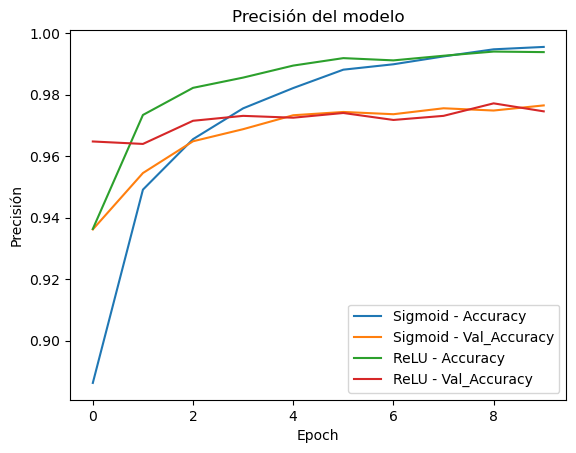

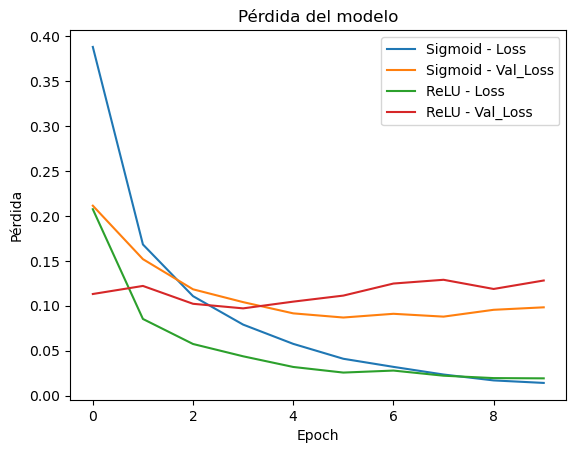

In [ ]:
import matplotlib.pyplot as plt

# Gr√°fico de precisi√≥n
plt.plot(history_sigmoid.history['accuracy'], label='Sigmoid - Accuracy')
plt.plot(history_sigmoid.history['val_accuracy'], label='Sigmoid - Val_Accuracy')
plt.plot(history_relu.history['accuracy'], label='ReLU - Accuracy')
plt.plot(history_relu.history['val_accuracy'], label='ReLU - Val_Accuracy')
plt.title('Precisi√≥n del modelo')
plt.ylabel('Precisi√≥n')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

# Gr√°fico de p√©rdida
plt.plot(history_sigmoid.history['loss'], label='Sigmoid - Loss')
plt.plot(history_sigmoid.history['val_loss'], label='Sigmoid - Val_Loss')
plt.plot(history_relu.history['loss'], label='ReLU - Loss')
plt.plot(history_relu.history['val_loss'], label='ReLU - Val_Loss')
plt.title('P√©rdida del modelo')
plt.ylabel('P√©rdida')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

Velocidad de convergencia: En general, ReLU converge m√°s r√°pido que sigmoid. Esto se debe a que la derivada de ReLU es constante para valores positivos, lo que evita el problema de la "desaparici√≥n del gradiente" que puede ocurrir con sigmoid.

M√©tricas obtenidas: ReLU suele obtener mejores resultados en t√©rminos de precisi√≥n y otras m√©tricas. Esto se debe a su mejor capacidad para aprender representaciones no lineales complejas.

## 10. Inicializaci√≥n de par√°metros

En este ejercicio, vamos a evaluar la importancia de una correcta inicializaci√≥n de par√°metros en una red neuronal.

**Pregunta 10.1 *(0.75 puntos)***: Partiendo de una red similar a la del ejercicio anterior (usando ya ReLUs), comentar las diferencias que se aprecian en el entrenamiento al utilizar distintas estrategias de inicializaci√≥n de par√°metros. Para ello, inicializar todas las capas con las siguientes estrategias, disponibles en Keras, y analizar sus diferencias:

* Inicializaci√≥n con ceros.
* Inicializaci√≥n con una variable aleatoria normal.
* Inicializaci√≥n con los valores por defecto de Keras para una capa Dense (estrategia *glorot uniform*)

In [ ]:
from tensorflow.keras.initializers import Zeros

model_zeros = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(784,), kernel_initializer=Zeros()),
    tf.keras.layers.Dense(10, activation='softmax', kernel_initializer=Zeros())
])

model_zeros.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_zeros = model_zeros.fit(
    training_images, training_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.1
)


Epoch 1/10
422/422 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 2ms/step - accuracy: 0.1114 - loss: 2.3020 - val_accuracy: 0.1050 - val_loss: 2.3018
Epoch 2/10
422/422 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 2ms/step - accuracy: 0.1118 - loss: 2.3013 - val_accuracy: 0.1050 - val_loss: 2.3020
Epoch 3/10
422/422 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 2ms/step - accuracy: 0.1118 - loss: 2.3013 - val_accuracy: 0.1050 - val_loss: 2.3021
Epoch 4/10
422/422 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 2ms/step - accuracy: 0.1120 - loss: 2.3014 - val_accuracy: 0.1050 - val_loss: 2.3020
Epoch 5/10
422/422 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 2ms/step - accuracy: 0.1147 - loss: 2.3008 - val_accuracy: 0.1050 - val_loss: 2.3019
Epoch 6/10
422/422 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 2ms/step - accuracy: 0.1151 - loss: 2.3007 - val_accuracy: 0.1050 - val_loss:

El modelo no aprende nada ya qyue todas las neuronas reciben los mismos gradientes y permanecen iguales sin mejorar la precisi√≥n con las √©pocas.

In [ ]:
from tensorflow.keras.initializers import RandomNormal

model_normal = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(784,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.05)),
    tf.keras.layers.Dense(10, activation='softmax', kernel_initializer=RandomNormal(mean=0.0, stddev=0.05))
])

model_normal.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_normal = model_normal.fit(
    training_images, training_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.1
)


Epoch 1/10
422/422 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 2ms/step - accuracy: 0.8508 - loss: 0.5254 - val_accuracy: 0.9657 - val_loss: 0.1269
Epoch 2/10
422/422 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 2ms/step - accuracy: 0.9615 - loss: 0.1322 - val_accuracy: 0.9748 - val_loss: 0.0871
Epoch 3/10
422/422 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 2ms/step - accuracy: 0.9772 - loss: 0.0786 - val_accuracy: 0.9773 - val_loss: 0.0776
Epoch 4/10
422/422 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 2ms/step - accuracy: 0.9849 - loss: 0.0556 - val_accuracy: 0.9817 - val_loss: 0.0688
Epoch 5/10
422/422 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 2ms/step - accuracy: 0.9893 - loss: 0.0404 - val_accuracy: 0.9797 - val_loss: 0.0715
Epoch 6/10
422/422 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 2ms/step - accuracy: 0.9920 - loss: 0.0289 - val_accuracy: 0.9805 - val_loss:

El modelo s√≠ entrena, pero puede llegar a tardar m√°s o ser inestable. Si los valores iniciales son demasiado grandes o peque√±os, los gradientes pueden explotar o desaparecer, especialmente con ReLU.

In [ ]:
model_glorot = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_glorot.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_glorot = model_glorot.fit(
    training_images, training_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.1
)


Epoch 1/10
422/422 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 2ms/step - accuracy: 0.8613 - loss: 0.4955 - val_accuracy: 0.9647 - val_loss: 0.1258
Epoch 2/10
422/422 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 2ms/step - accuracy: 0.9636 - loss: 0.1259 - val_accuracy: 0.9735 - val_loss: 0.0942
Epoch 3/10
422/422 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 2ms/step - accuracy: 0.9781 - loss: 0.0763 - val_accuracy: 0.9778 - val_loss: 0.0796
Epoch 4/10
422/422 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 2ms/step - accuracy: 0.9851 - loss: 0.0538 - val_accuracy: 0.9798 - val_loss: 0.0705
Epoch 5/10
422/422 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 2ms/step - accuracy: 0.9899 - loss: 0.0372 - val_accuracy: 0.9795 - val_loss: 0.0693
Epoch 6/10
422/422 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 2ms/step - accuracy: 0.9932 - loss: 0.0273 - val_accuracy: 0.9815 - val_loss:

Esta es la inicializaci√≥n que se hace por defecto. Es la m√°s balanceada y eficiente para redes densas con ReLU. Se espera buena convergencia desde las primeras √©pocas.

## 11. Optimizadores

**Problema 11.1 *(0.75 puntos)***: Partiendo de una red similar a la del ejercicio anterior (utilizando la mejor estrategia de inicializaci√≥n observada), comparar y analizar las diferencias que se observan  al entrenar con varios de los optimizadores vistos en clase, incluyendo SGD como optimizador b√°sico (se puede explorar el espacio de hiperpar√°metros de cada optimizador, aunque para optimizadores m√°s avanzados del estilo de RMSprop es buena idea dejar los valores por defecto provistos por Keras).

### SGD (Stochastic Gradient Descent)

In [ ]:
from tensorflow.keras.optimizers import SGD

model_sgd = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_sgd.compile(optimizer=SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

history_sgd = model_sgd.fit(
    training_images, training_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.1
)


Epoch 1/10


c:\Users\Usuario\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


422/422 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 2ms/step - accuracy: 0.6072 - loss: 1.5821 - val_accuracy: 0.8808 - val_loss: 0.5986
Epoch 2/10
422/422 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 2ms/step - accuracy: 0.8586 - loss: 0.6058 - val_accuracy: 0.9030 - val_loss: 0.4086
Epoch 3/10
422/422 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 2ms/step - accuracy: 0.8850 - loss: 0.4563 - val_accuracy: 0.9148 - val_loss: 0.3433
Epoch 4/10
422/422 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 2ms/step - accuracy: 0.8927 - loss: 0.4006 - val_accuracy: 0.9198 - val_loss: 0.3097
Epoch 5/10
422/422 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 2ms/step - accuracy: 0.9010 - loss: 0.3711 - val_accuracy: 0.9237 - val_loss: 0.2881
Epoch 6/10
422/422 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 2ms/step - accuracy: 0.9072 - loss: 0.3423 - val_accuracy: 0.9270 - val_loss: 0.2725
Epo

Tiene un aprendizaje m√°s lento, por lo que puede requerir m√°s √©pocas. Es sensible a la tasa de aprendizaje.

### RMSprop

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model_rmsprop = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_rmsprop.compile(optimizer=RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'])

history_rmsprop = model_rmsprop.fit(
    training_images, training_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.1
)


Epoch 1/10
422/422 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 2ms/step - accuracy: 0.8631 - loss: 0.4678 - val_accuracy: 0.9647 - val_loss: 0.1308
Epoch 2/10
422/422 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 2ms/step - accuracy: 0.9626 - loss: 0.1274 - val_accuracy: 0.9740 - val_loss: 0.0960
Epoch 3/10
422/422 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 2ms/step - accuracy: 0.9781 - loss: 0.0751 - val_accuracy: 0.9775 - val_loss: 0.0733
Epoch 4/10
422/422 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 2ms/step - accuracy: 0.9843 - loss: 0.0529 - val_accuracy: 0.9807 - val_loss: 0.0665
Epoch 5/10
422/422 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 2ms/step - accuracy: 0.9879 - loss: 0.0411 - val_accuracy: 0.9793 - val_loss: 0.0683
Epoch 6/10
422/422 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 2ms/step - accuracy: 0.9907 - loss: 0.0323 - val_accuracy: 0.9803 - val_loss:

Tiene un entrenamiento r√°pido y estable. Bueno para problemas con ruido o muchas caracter√≠sticas.

### Adam

In [ ]:
from tensorflow.keras.optimizers import Adam

model_adam = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_adam.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

history_adam = model_adam.fit(
    training_images, training_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.1
)


Epoch 1/10
422/422 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 2ms/step - accuracy: 0.8647 - loss: 0.4834 - val_accuracy: 0.9643 - val_loss: 0.1280
Epoch 2/10
422/422 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 2ms/step - accuracy: 0.9633 - loss: 0.1292 - val_accuracy: 0.9728 - val_loss: 0.0928
Epoch 3/10
422/422 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 2ms/step - accuracy: 0.9771 - loss: 0.0806 - val_accuracy: 0.9780 - val_loss: 0.0756
Epoch 4/10
422/422 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 2ms/step - accuracy: 0.9842 - loss: 0.0544 - val_accuracy: 0.9808 - val_loss: 0.0697
Epoch 5/10
422/422 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 2ms/step - accuracy: 0.9890 - loss: 0.0385 - val_accuracy: 0.9803 - val_loss: 0.0682
Epoch 6/10
422/422 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 2ms/step - accuracy: 0.9919 - loss: 0.0298 - val_accuracy: 0.9803 - val_loss:

Adam combina lo mejor de SGD con momento y adaptabilidad. Es el m√°s robusto y eficiente para la mayor√≠a de los casos, ofreciendo alta precisi√≥n en menos √©pocas.

## 12. Regularizaci√≥n y red final *(1.25 puntos)*

**Problema 12.1 *(2 puntos)***: Entrenar una red final que sea capaz de obtener una accuracy en el validation superior al 95%. Para ello, combinar todo lo aprendido anteriormente y utilizar t√©cnicas de regularizaci√≥n para evitar overfitting. Algunos de los elementos que pueden tenerse en cuenta son los siguientes.

* N√∫mero de capas y neuronas por capa
* Optimizadores y sus par√°metros
* Batch size
* Unidades de activaci√≥n
* Uso de capas dropout, regularizaci√≥n L2, regularizaci√≥n L1...
* Early stopping (se puede aplicar como un callback de Keras, o se puede ver un poco "a ojo" cu√°ndo el modelo empieza a caer en overfitting y seleccionar el n√∫mero de epochs necesarias)
* Batch normalization

Si los modelos entrenados anteriormente ya se acercaban al valor requerido de accuracy, probar distintas estrategias igualmente y comentar los resultados.

Explicar brevemente la estrategia seguida y los modelos probados para obtener el modelo final, que debe verse entrenado en este Notebook. No es necesario guardar el entrenamiento de todos los modelos que se han probado, es suficiente con explicar c√≥mo se ha llegado al modelo final.

Tras probas muchos modelos con diferente n√∫mero de neuronas, capas ocultas y diferentes m√©todos de dropout u optimizadores y he llegado a la conclusi√≥n de que este dataset es muy sencillo, por lo que se puede llegar a un buen porcentaje de aciertos sin complicar mucho el modelo.

Como modelo final he creado uno que probase los diferentes m√©todos probados en este notebook y explicados en clase. He utilizado dos capas ocultas densas con activaci√≥n relu y regularizaci√≥n L2, para estabilizar el aprendizaje. Apliqu√© dropaut 0.3 y 0.5 en las capas ocultaas para reducir el sobreajuste y BatchNormalization para estabilizar el aprendizaje. Emple√© Adam por su velocidad en la convergencia y utilic√© EarlyStopping sobre la p√©rdida en validaci√≥n, deteniendo el entrenamiento si no hab√≠a mejoras sobre tres √©pocas consecutivas.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model_final = Sequential([
    Dense(512, activation='relu', kernel_regularizer=l2(0.001), input_shape=(784,)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),

    Dense(10, activation='softmax')
])

model_final.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

history_final = model_final.fit(
    training_images, training_labels,
    epochs=30,
    batch_size=128,
    validation_split=0.1,
    callbacks=[early_stop]
)


Epoch 1/30
422/422 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 4ms/step - accuracy: 0.8337 - loss: 1.2988 - val_accuracy: 0.9673 - val_loss: 0.6203
Epoch 2/30
422/422 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - accuracy: 0.9481 - loss: 0.6153 - val_accuracy: 0.9732 - val_loss: 0.4150
Epoch 3/30
422/422 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - accuracy: 0.9582 - loss: 0.4397 - val_accuracy: 0.9738 - val_loss: 0.3316
Epoch 4/30
422/422 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - accuracy: 0.9597 - loss: 0.3597 - val_accuracy: 0.9772 - val_loss: 0.2819
Epoch 5/30
422/422 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - accuracy: 0.9624 - loss: 0.3146 - val_accuracy: 0.9725 - val_loss: 0.2661
Epoch 6/30
422/422 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - accuracy: 0.9633 - loss: 0.2928 - val_accuracy: 0.9732 - val_loss:

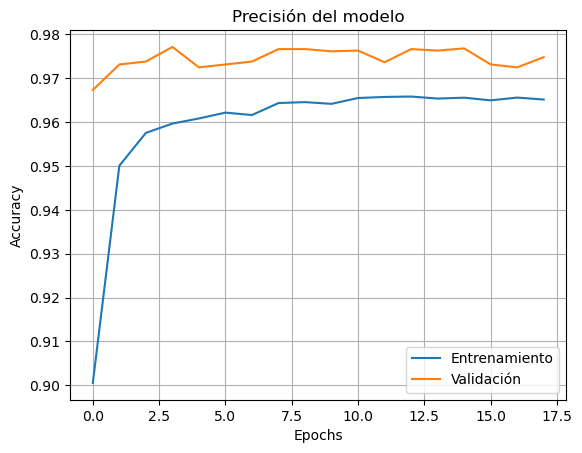

In [ ]:
import matplotlib.pyplot as plt

# Gr√°fica de precisi√≥n
plt.plot(history_final.history['accuracy'], label='Entrenamiento')
plt.plot(history_final.history['val_accuracy'], label='Validaci√≥n')
plt.title('Precisi√≥n del modelo')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


Como podemos ver, aunque el objetivo de precisi√≥n ya se cumpli√≥ con modelos anteriores, este modelo tambi√©n super√≥ el objetivo de 95% de precisi√≥n en validaci√≥n, alcanzando picos del 97.7%.

La precisi√≥n de entrenamiento se mantuvo cercana al 96.6‚Äì96.9%, mientras que la precisi√≥n de validaci√≥n se estabiliz√≥ entre 97.2% y 97.7%, mostrando un buen equilibrio sin sobreajuste.

La p√©rdida de validaci√≥n disminuy√≥ progresivamente hasta estabilizarse alrededor de 0.21, lo cual indica una buena capacidad de generalizaci√≥n.

La gr√°fica muestra que no hay una divergencia significativa entre entrenamiento y validaci√≥n, lo cual refuerza que las t√©cnicas de regularizaci√≥n aplicadas fueron efectivas.